In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
from sklearn.model_selection import train_test_split 
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score , mean_squared_error 

In [5]:
df = pd.read_csv("emp_data.csv")
df.sample(3)

,Salary_hike,Churn_out_rate
5,1690,70
8,1800,62
7,1730,65


# Data Understanding

In [6]:
df.shape

(10, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [8]:
df.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [11]:
df.skew()

Salary_hike       0.858375
Churn_out_rate    0.647237
dtype: float64

In [12]:
df.kurtosis()

Salary_hike       0.165793
Churn_out_rate   -0.328199
dtype: float64

# EDA

<Axes: xlabel='Churn_out_rate', ylabel='Salary_hike'>

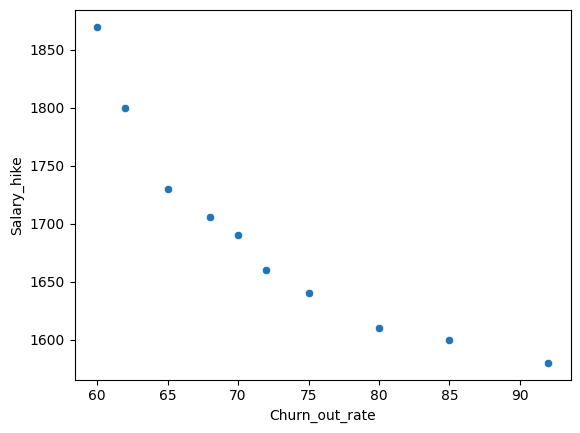

In [14]:
sns.scatterplot(df,x='Churn_out_rate',y='Salary_hike')

<Axes: xlabel='Churn_out_rate', ylabel='Density'>

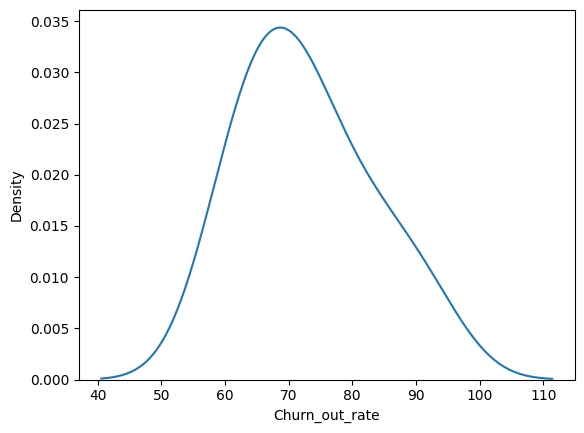

In [15]:
sns.kdeplot(df,x='Churn_out_rate')

<Axes: xlabel='Salary_hike', ylabel='Density'>

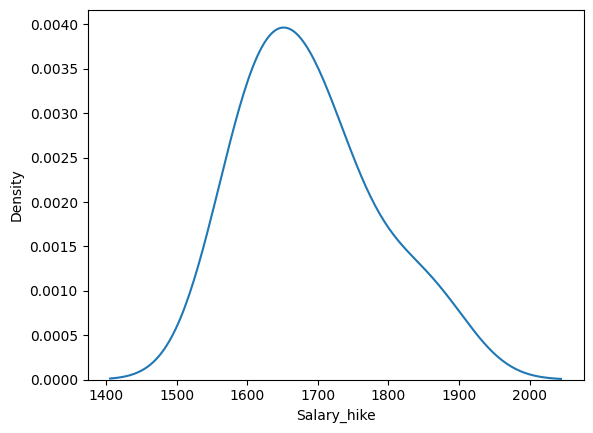

In [16]:
sns.kdeplot(df,x='Salary_hike')

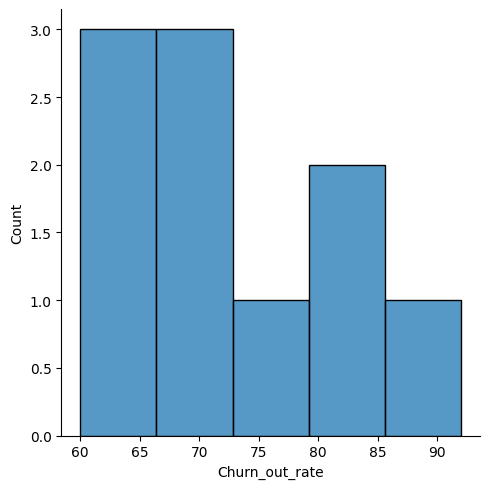

In [25]:
sns.displot(df,x='Churn_out_rate',kind='hist')

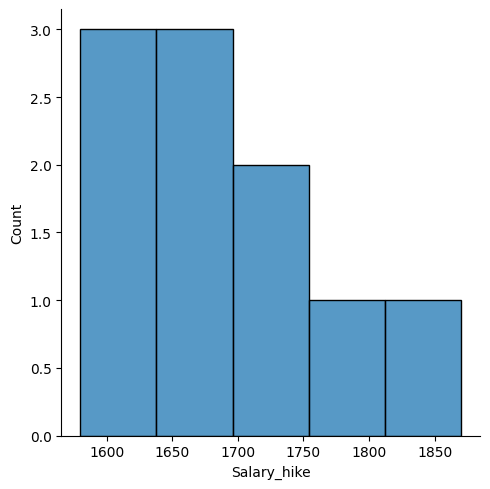

In [26]:
sns.displot(df,x='Salary_hike',kind='hist')

<Axes: >

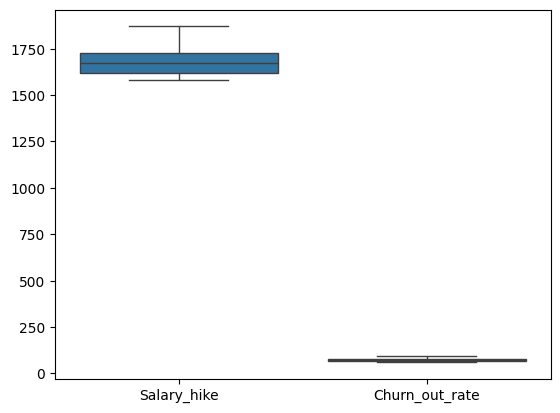

In [27]:
sns.boxplot(df)

<Axes: ylabel='Churn_out_rate'>

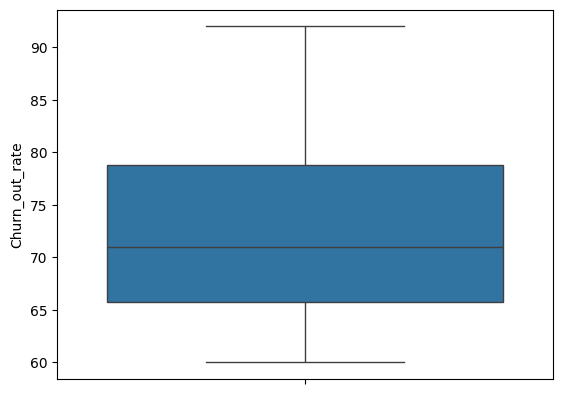

In [28]:
sns.boxplot(df['Churn_out_rate'])

<Axes: ylabel='Salary_hike'>

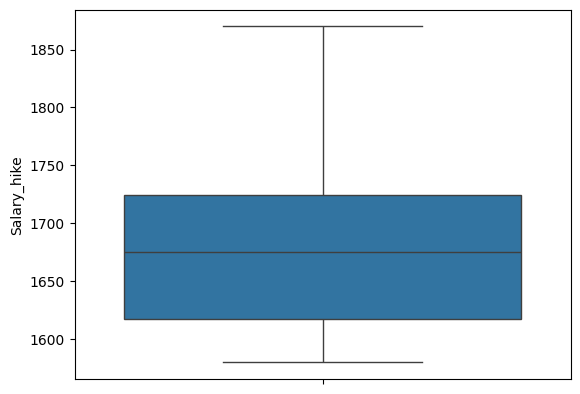

In [29]:
sns.boxplot(df['Salary_hike'])

In [43]:
X_train = df['Churn_out_rate']
y_train = df['Salary_hike']

In [31]:
# logo trainsfromation to get the data  
# scating is import  
from sklearn.preprocessing import PowerTransformer,PolynomialFeatures , MinMaxScaler 
min_scaler = MinMaxScaler()

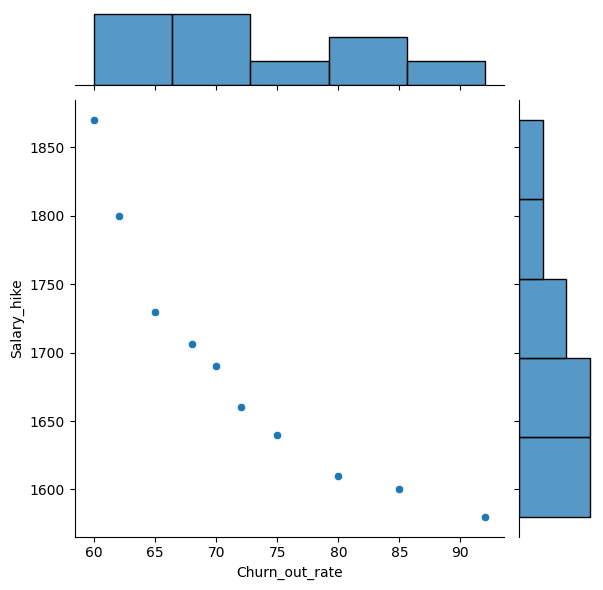

In [32]:
sns.jointplot(df,x='Churn_out_rate',y='Salary_hike')

<Axes: >

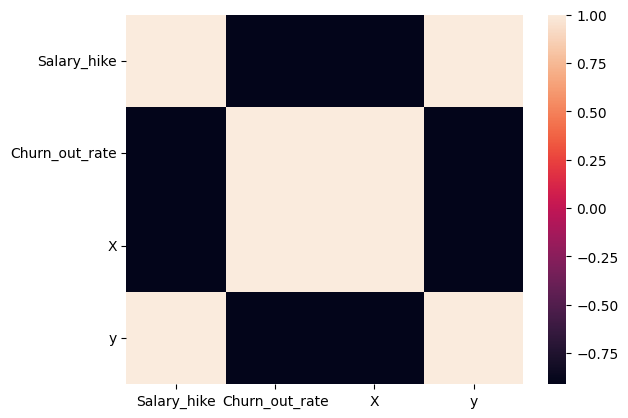

In [66]:
sns.heatmap(df.corr())

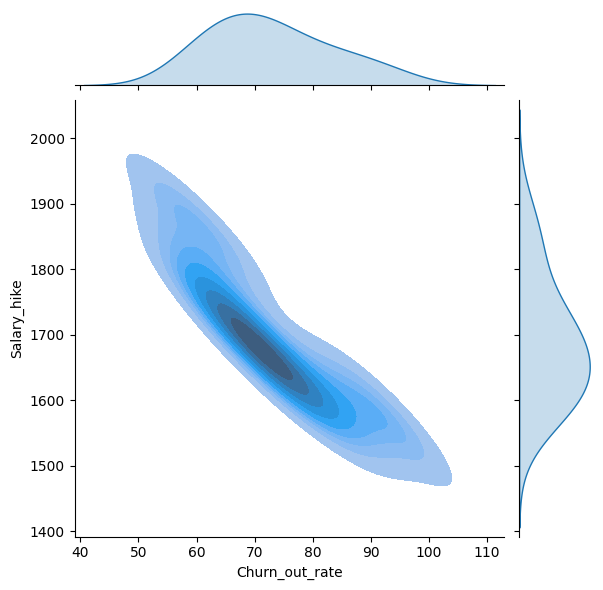

In [35]:
sns.jointplot(df,x='Churn_out_rate',y='Salary_hike',kind='kde',fill=True)

<Axes: ylabel='Churn_out_rate'>

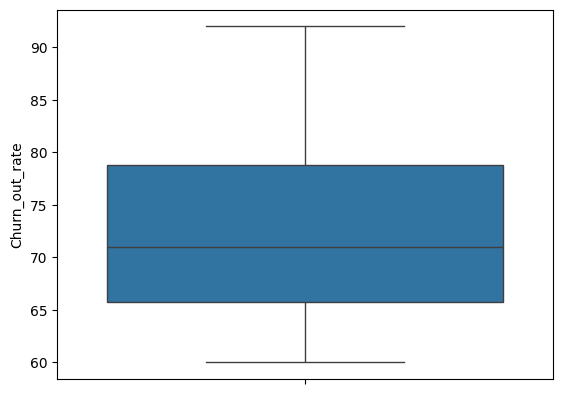

In [36]:
sns.boxplot(df['Churn_out_rate'])

<Axes: ylabel='Salary_hike'>

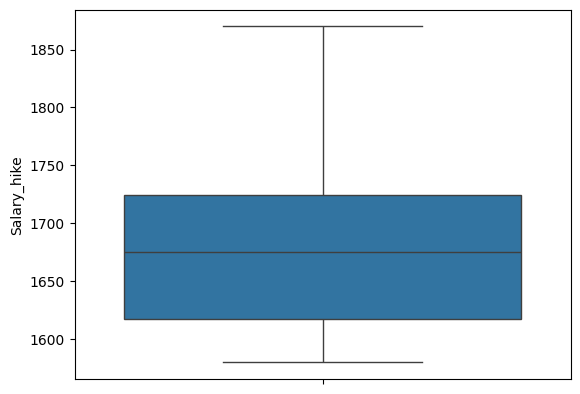

In [37]:
sns.boxplot(df['Salary_hike'])

In [38]:
df['X']=df['Churn_out_rate']
df['y']=df['Salary_hike']
import statsmodels.formula.api as smf
model=smf.ols('y~X',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000239
Time:                        15:57:19   Log-Likelihood:                -49.995
No. Observations:                  10   AIC:                             104.0
Df Residuals:                       8   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2285.3653     95.912     23.828      0.0

C:\Users\raj\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
predict1=model.predict(pd.DataFrame(df.X))
predict1

0    1532.245855
1    1589.548421
2    1630.478826
3    1671.409230
4    1695.967473
5    1712.339635
6    1728.711796
7    1753.270039
8    1777.828282
9    1794.200444
dtype: float64

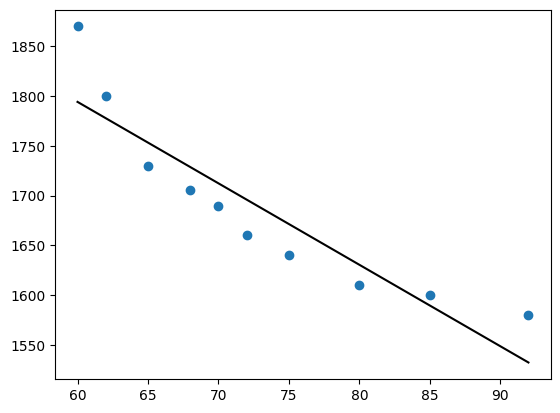

In [40]:
#regresion line 
plt.scatter(df[['X']],df.y)
plt.plot(df.X,predict1,'black')

In [41]:
r2_score(df.y,predict1)

0.8312363099883754

In [45]:
lin2=LinearRegression()


In [50]:
lin2.fit(df[['X']],df[['y']])

LinearRegression()

In [51]:
y_pre=lin2.predict(df[['X']])

In [52]:
r2_score(df['y'],y_pre)

0.8312363099883755

In [53]:
pol = PolynomialFeatures()

In [54]:
x_train=pol.fit_transform(df[['X']])

In [55]:
y_tran_pol = pol.fit_transform(df[['y']])

In [57]:
lin3 = LinearRegression()
lin3.fit(x_train,y_tran_pol)

LinearRegression()

In [58]:
y_pre3=lin3.predict(x_train)

In [63]:
r2_score(y_tran_pol,y_pre3)

0.98102859305877